 # Creating A Gray Scale Image with Python

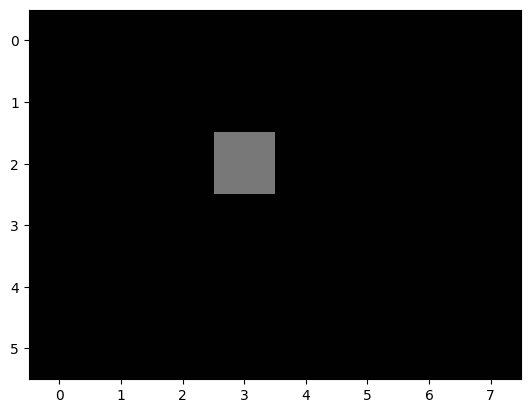

In [81]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

im=np.ones((6,8),dtype=np.uint8)
im[2,3]=120
fig,ax=plt.subplots()
ax.imshow(im,cmap='gray',vmin=0,vmax=255)
plt.show()



# Creating a Color Image in Python

[100   0 255]


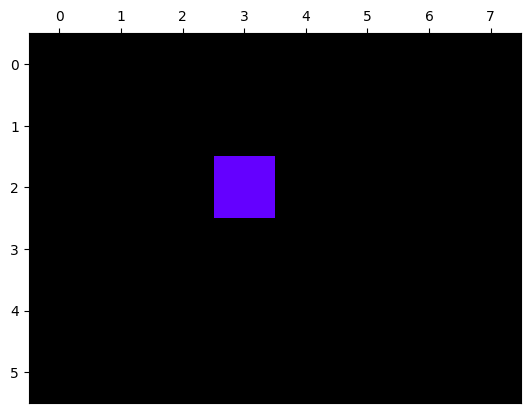

In [82]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = np.zeros((6,8,3),dtype = np.uint8)
im[2,3] = [100,0,255]
print(im[2,3])
fig,ax = plt.subplots()
ax.imshow(im)
ax.xaxis.tick_top()
plt.show()

# Upload an image to Python

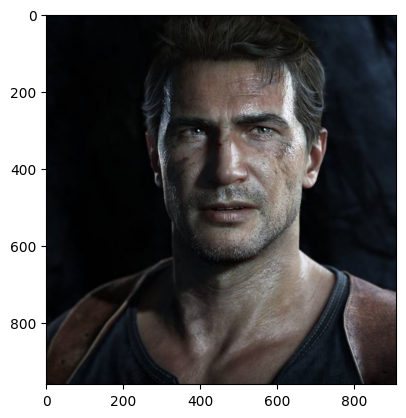

In [83]:
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('images/nathandrake.jpg',cv.IMREAD_COLOR)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
fig,ax=plt.subplots()
ax.imshow(img)


# Creating A 3*3 KERNEL and AVERAGING

([], [])

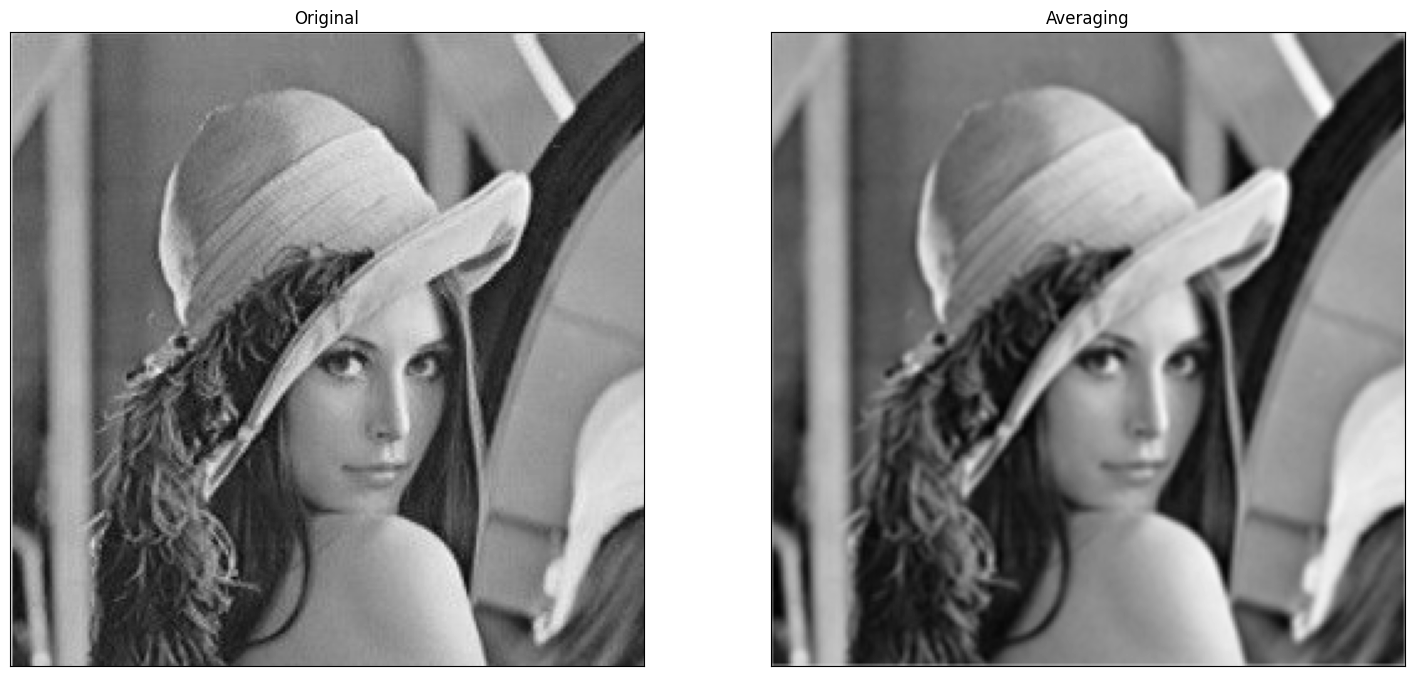

In [84]:
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('images/girl.jpg',cv.IMREAD_GRAYSCALE)

kernel=np.ones((3,3))/9
output_shape = (img.shape[0] - 2, img.shape[1] - 2)
averaged_image = np.empty(output_shape)
for i in range(output_shape[0]):
    for j in range(output_shape[1]):
      window = img[i:i+3, j:j+3]
      averaged_image[i, j] = np.sum(window * kernel)
fig,axes = plt.subplots(1,2,sharex ='all',sharey ='all',figsize =(18,18))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(averaged_image,cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]),axes[1].set_yticks([])




# Average Filter using Pillow library

([], [])

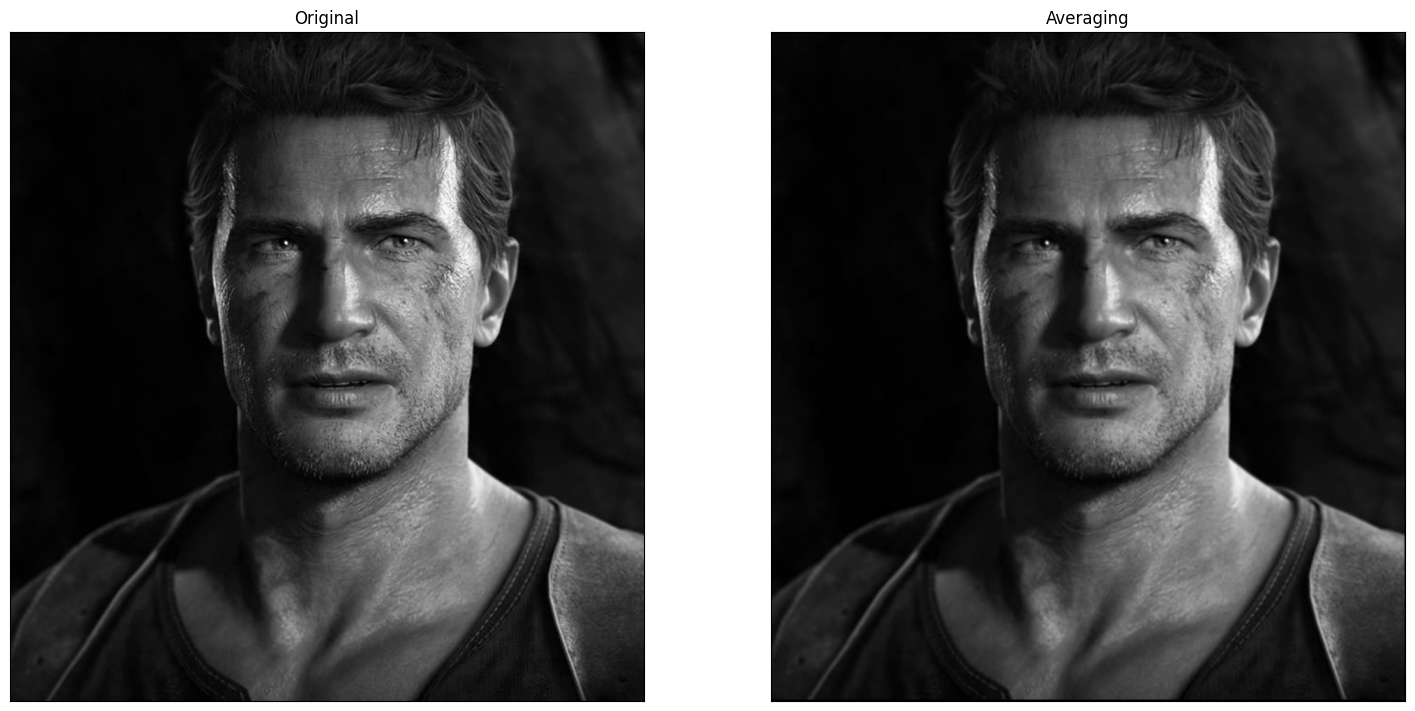

In [85]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('images/nathandrake.jpg').convert('L')
image_array =np.asarray(image,dtype=np.float32)
filtered_image =np.zeros_like(image_array)
rows,cols = image_array.shape
offset = 3
for x in range(1,rows -2):
    for y in range(1,cols -2):
        sum_pixels=(image_array[x-1,y-1]+image_array[x-1,y]+image_array[x-1,y+1]+image_array[x,y-1]+image_array[x,y]+image_array[x,y+1]+image_array[x+1,y-1]+image_array[x+1,y]+image_array[x+1,y+1])
        average_value =sum_pixels//9
        filtered_image[x,y]=average_value
fig,axes = plt.subplots(1,2,sharex ='all',sharey ='all',figsize =(18,18))
axes[0].imshow(image_array,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(filtered_image,cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]),axes[1].set_yticks([])



# Filtering using a 256*256 resolution image

258 258


([], [])

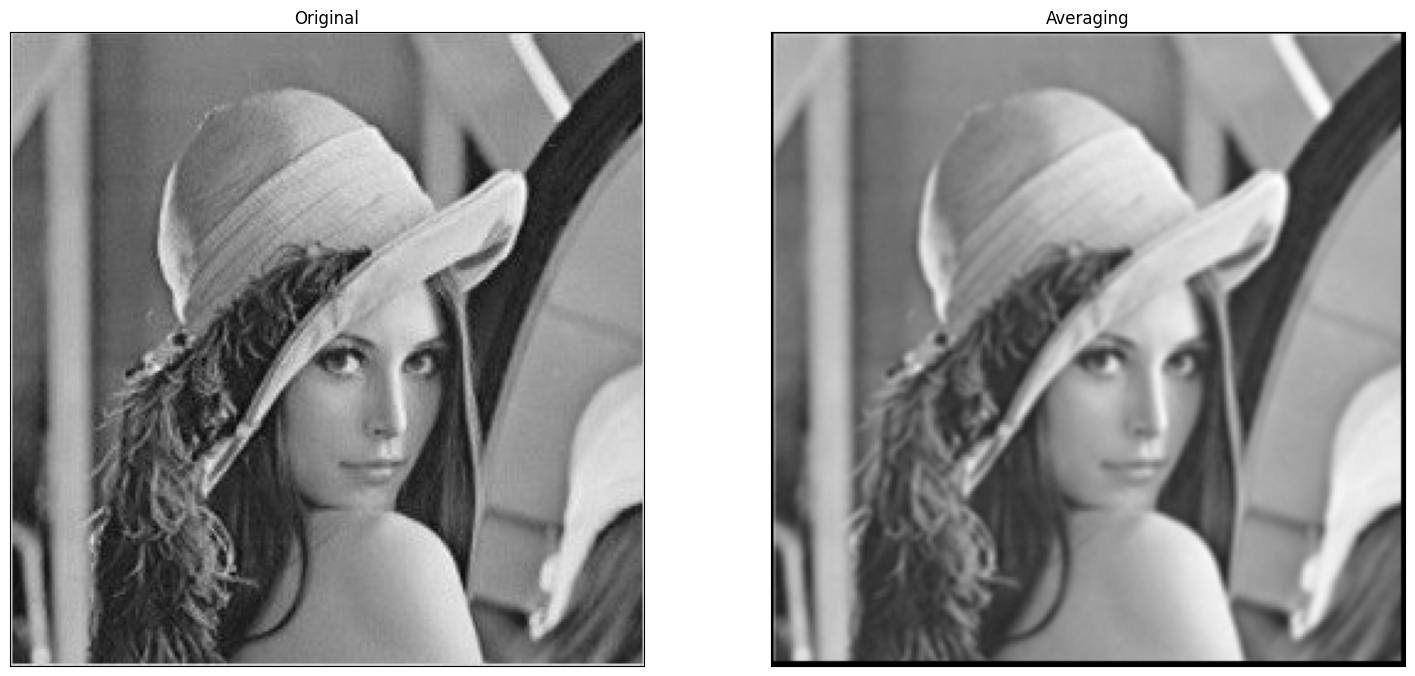

In [86]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('images/girl.jpg').convert('L')
image_array =np.asarray(image,dtype=np.float32)
filtered_image =np.zeros_like(image_array)
rows,cols = image_array.shape
print(rows,cols)

for x in range(1,rows -2):
    for y in range(1,cols -2):
        sum_pixels=(image_array[x-1,y-1]+image_array[x-1,y]+image_array[x-1,y+1]+image_array[x,y-1]+image_array[x,y]+image_array[x,y+1]+image_array[x+1,y-1]+image_array[x+1,y]+image_array[x+1,y+1])
        average_value =sum_pixels//9
        filtered_image[x,y]=average_value
fig,axes = plt.subplots(1,2,sharex ='all',sharey ='all',figsize =(18,18))
axes[0].imshow(image_array,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(filtered_image,cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]),axes[1].set_yticks([])


# average filter with offset set to 1

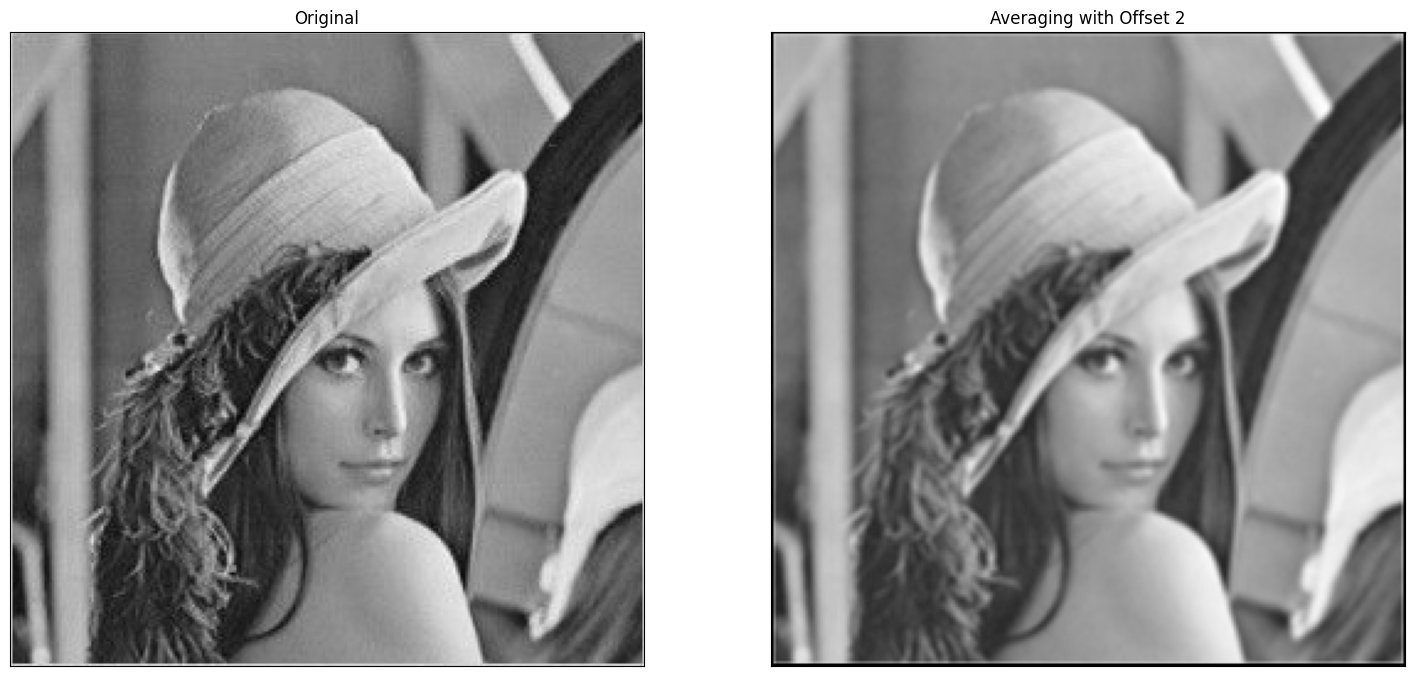

In [80]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('images/girl.jpg', cv.IMREAD_GRAYSCALE)
image_array = np.asarray(image, dtype=np.float32)
filtered_image = np.zeros_like(image_array)
rows, cols = image_array.shape
offset = 1

for x in range(offset, rows - offset):
    for y in range(offset, cols - offset):
        sum_pixels = (
            image_array[x-offset, y-offset] + image_array[x-offset, y] + image_array[x-offset, y+offset] +
            image_array[x, y-offset] + image_array[x, y] + image_array[x, y+offset] +
            image_array[x+offset, y-offset] + image_array[x+offset, y] + image_array[x+offset, y+offset]
        )
        average_value = sum_pixels // 9
        filtered_image[x, y] = average_value

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(18, 18))
axes[0].imshow(image_array)
axes[0].set_title('Original')
axes[1].imshow(filtered_image, cmap='gray')
axes[1].set_title('Averaging with Offset 2')

plt.show()




# Median Filtering


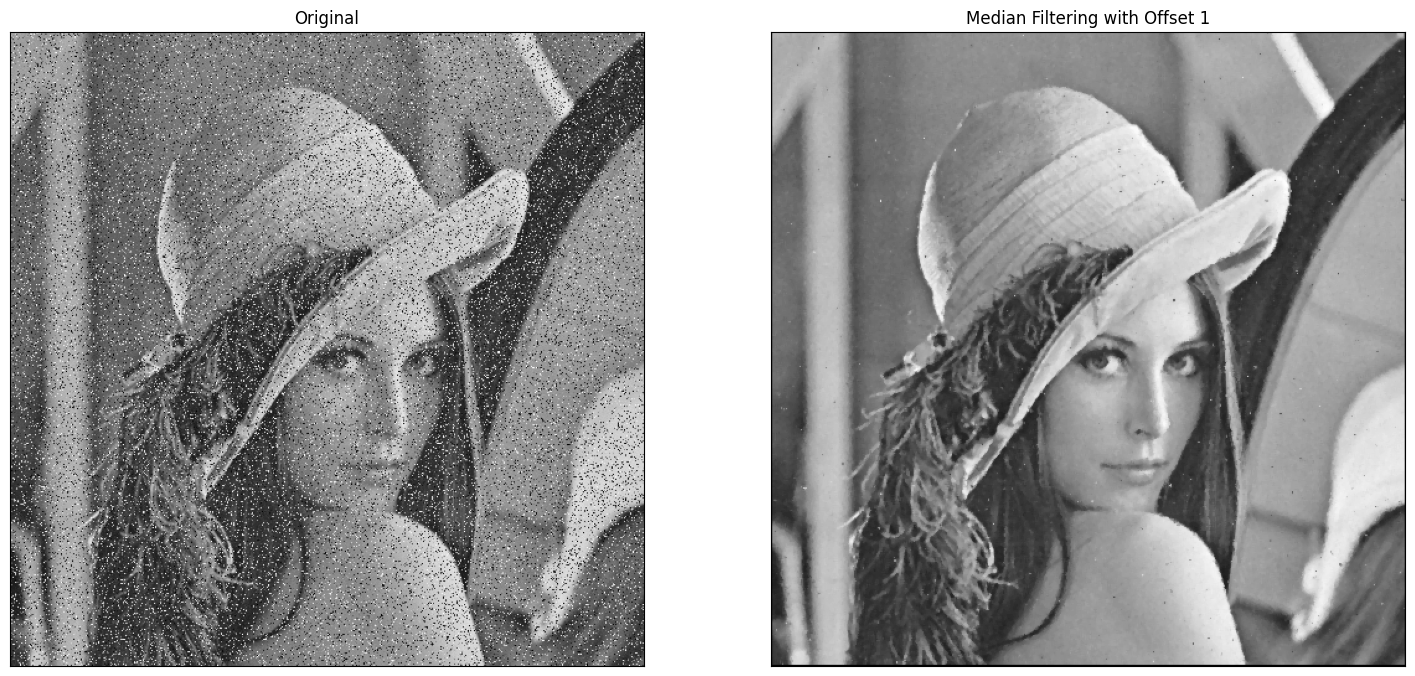

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('images/lena.jpeg').convert('L')
image_array = np.asarray(image, dtype=np.float32)
filtered_image = np.zeros_like(image_array)
rows, cols = image_array.shape

offset = 1

for x in range(offset, rows - offset):
    for y in range(offset, cols - offset):
        window = [
            image_array[x-offset, y-offset] , image_array[x-offset, y] , image_array[x-offset, y+offset] ,
            image_array[x, y-offset] , image_array[x, y] , image_array[x, y+offset] ,
            image_array[x+offset, y-offset] , image_array[x+offset, y] , image_array[x+offset, y+offset]
        ]

        sorted_values =sorted(window)
        median_v = len(sorted_values+1)//2

        median_value = sorted_values[median_v]

        filtered_image[x, y] = median_value

fig, axes = plt.subplots(1, 2, figsize=(18, 18))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(filtered_image, cmap='gray')
axes[1].set_title('Median Filtering with Offset 1')

plt.show()



# Using Filter2D

Text(0.5, 1.0, '$\\frac{d f(x)}{dx}$')

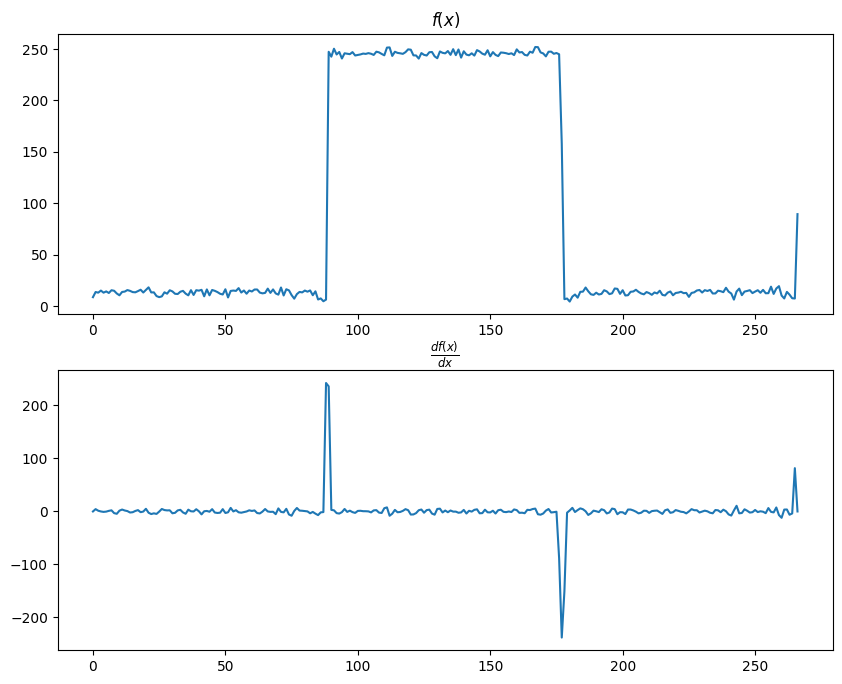

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image=cv.imread('images/bw.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)/255.0
assert image is not None

mean,sigma=0,0.01
noise=np.random.normal(mean,sigma,image.shape).astype(np.float32)
noisy_image=np.add(image,noise)* 255.0
noisy_image=cv.normalize(noisy_image,None,0,255,cv.NORM_MINMAX)

kernel=np.array([-1,0,1]).astype(np.float32)
f = noisy_image[100,:]
fx=cv.filter2D(f,cv.CV_32F,kernel)

fig,ax=plt.subplots(2,figsize=(10,8))
ax[0].plot(f)
ax[0].set_title(r'$f(x)$')
ax[1].plot(fx)
ax[1].set_title(r'$\frac{d f(x)}{dx}$')

# Gaussian Filter

In [25]:
g=cv.getGaussianKernel(11,5,cv.CV_32F)
fg=cv.filter2D(fx,cv.CV_32F,g)

Text(0.5, 1.0, 'gaussian filtered$f(x)$')

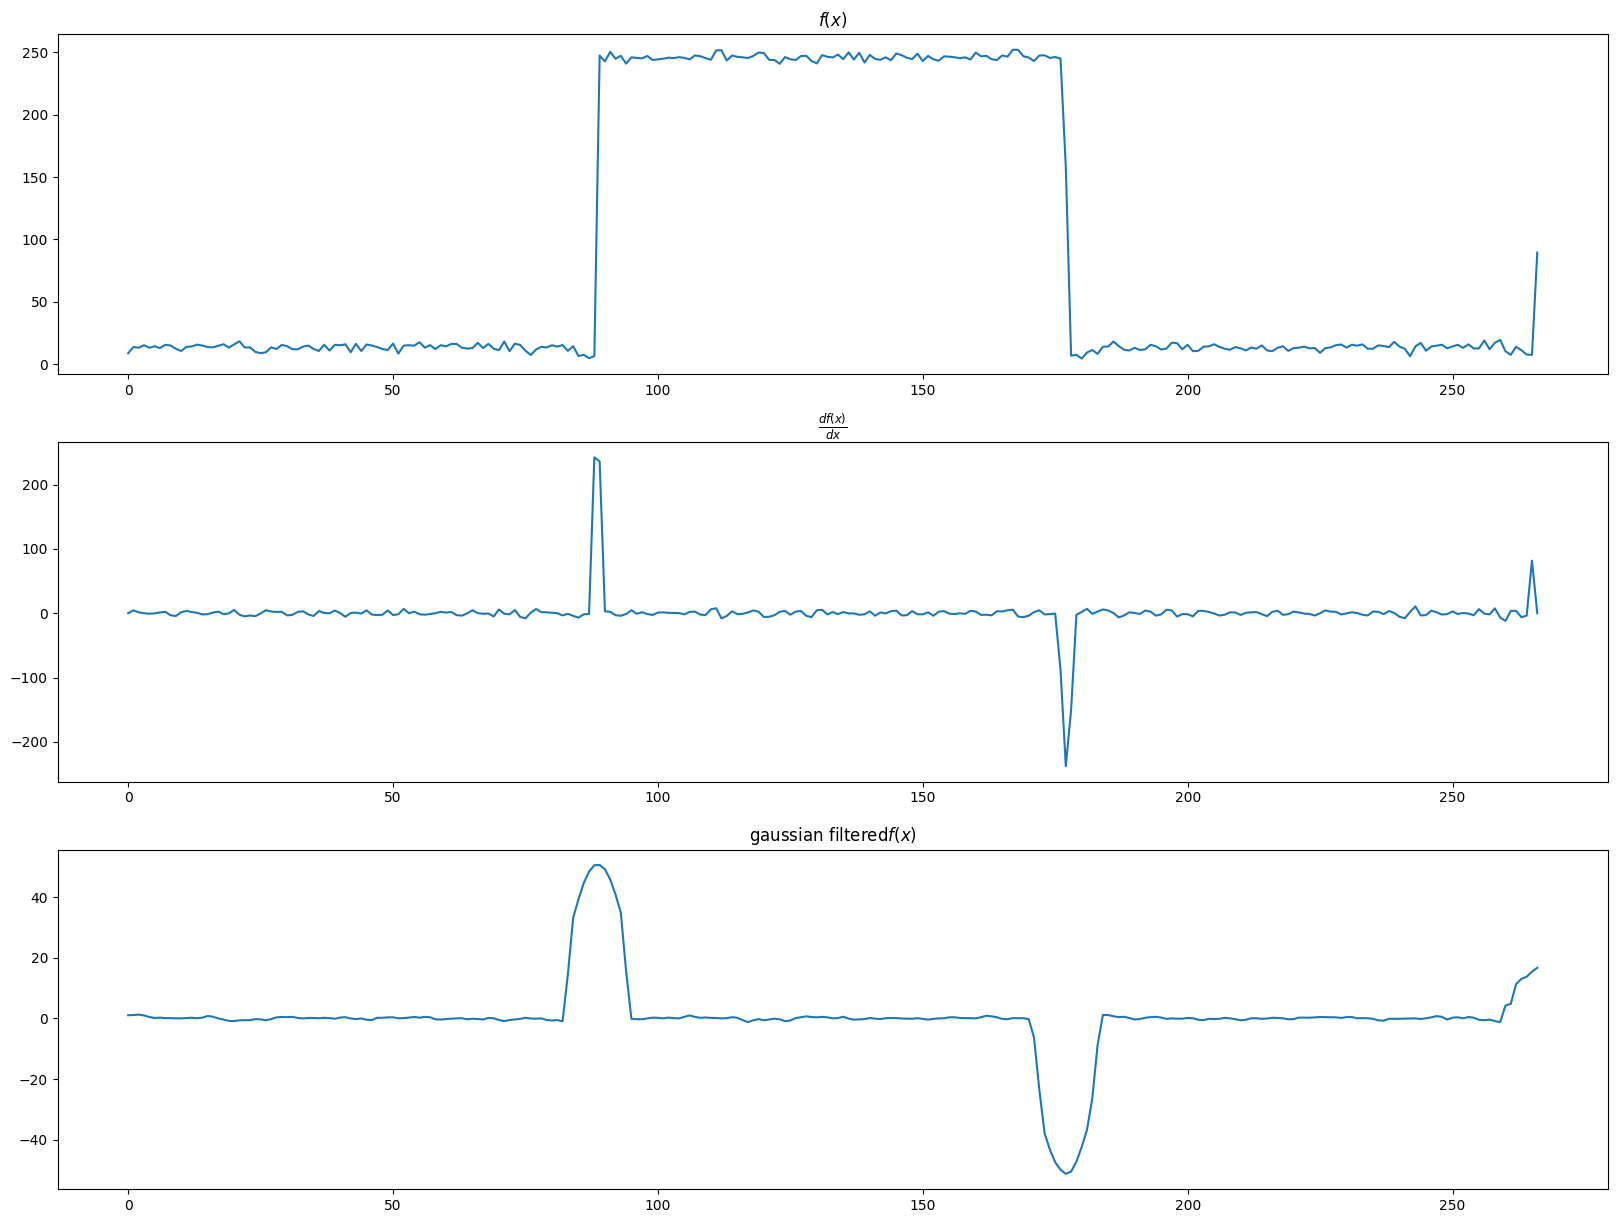

In [26]:
fig,ax=plt.subplots(3,figsize=(20,15))
ax[0].plot(f)
ax[0].set_title(r'$f(x)$')
ax[1].plot(fx)
ax[1].set_title(r'$\frac{d f(x)}{dx}$')
ax[2].plot(fg)
ax[2].set_title('gaussian filtered'+''+r'$f(x)$')

# Canny Edge Detector

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
C:\Users\User\AppData\Local\Temp\ipykernel_30708\2658433588.py:3: SyntaxWarning: invalid escape sequence '\g'
  image=cv.imread('images\girl.jpg',cv.IMREAD_GRAYSCALE)


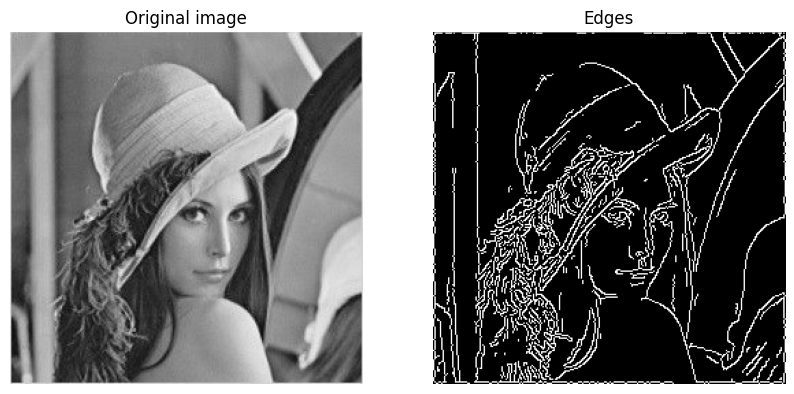

In [15]:
import cv2 as cv
import matplotlib.pyplot as plt
image=cv.imread('images\girl.jpg',cv.IMREAD_GRAYSCALE)
assert image is not None
low = 100
high =150
edges = cv.Canny(image,low,high)
plt.figure(figsize=(10,5))
#Original Image
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original image')
plt.axis('off')
#Edges
plt.subplot(1,2,2)
plt.imshow(edges,cmap='gray')
plt.title('Edges')
plt.axis('off')
plt.show()

# Canny Edge without cv.Canny

(-0.5, 257.5, 257.5, -0.5)

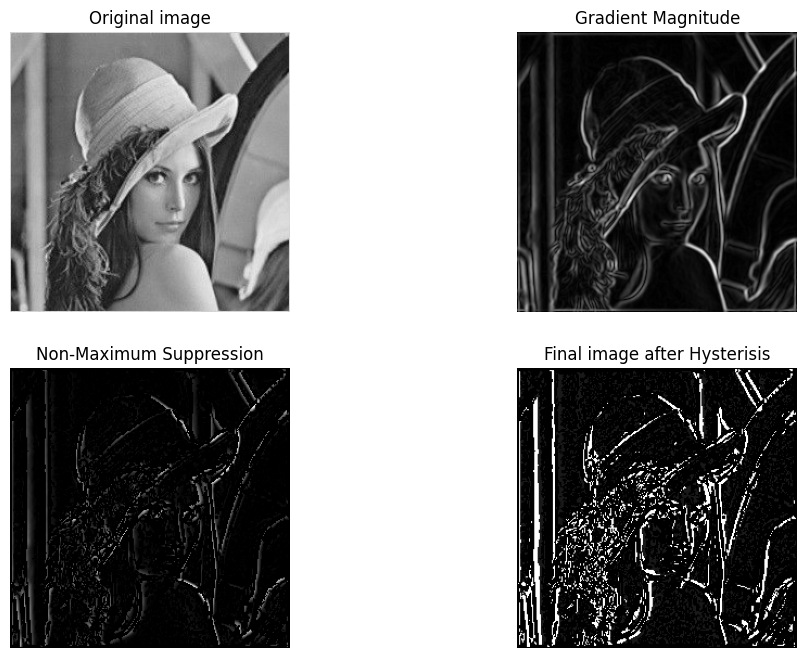

In [28]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv 
image = cv.imread('images/girl.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)/255.0
assert image is not None
blur=cv.GaussianBlur(image,(5,5),0)

sobelx=cv.Sobel(blur,cv.CV_64F,1,0,ksize=3)
sobely=cv.Sobel(blur,cv.CV_64F,0,1,ksize=3)

magnitude=np.sqrt(sobelx**2 +sobely**2)
angle=np.arctan2(sobely,sobelx)*(180/np.pi)%180

m,n =magnitude.shape
Z=np.zeros((m,n),dtype=np.float32)
angle[angle <0] += 180

for i in range(1,m-1):
    for j in range(1,n-1):
        try:
            q = 255
            r= 255
            #Determine the angle
            #Angle 0
            if(0<=angle[i,j]<22.5) or (157.5 <= angle[i,j]<=180):
                q=magnitude[i,j+1]
                r=magnitude[i,j-1]
            #angle 45
            elif(22.5<=angle[i,j] <67.5):
                q=magnitude[i+1,j+1]
                r=magnitude[i-1,j+1]
            #Angle 135
            elif(112.5<=angle[i,j]<157.5):
                q=magnitude[i-1,j-1]
                r=magnitude[i+1,j+1]
            #Determine Magnitude and Edge
            if magnitude[i,j]>=q and magnitude[i,j]<=r:
                Z[i,j] = magnitude[i,j]
            else:
                Z[i,j]=0
        except IndexError as e:
            pass
nms =Z#applying Hysterisis
highThreshold=nms.max()*0.099
lowThreshold=highThreshold*0.05

res =np.zeros((m,n),dtype=np.float32)
weak=np.float32(25)
strong=np.float32(255)

strong_i,strong_j =np.where(nms>=highThreshold)
zeros_i,zeros_j=np.where(nms<lowThreshold)

weak_i,weak_j=np.where((nms<=highThreshold) & (nms >=lowThreshold))

res[strong_i,strong_j]=strong
res[weak_i,weak_j]=weak

final_img =res

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(magnitude,cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(nms,cmap='gray')
plt.title('Non-Maximum Suppression')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(final_img,cmap='gray')
plt.title('Final image after Hysterisis')
plt.axis('off')









                
            




# Image Segmentation

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('images/girl.jpg').convert('L')
img_array=list(img.getdata())
img_array=[img_arry[i:i + img.width]]

 # Seed Segmentation

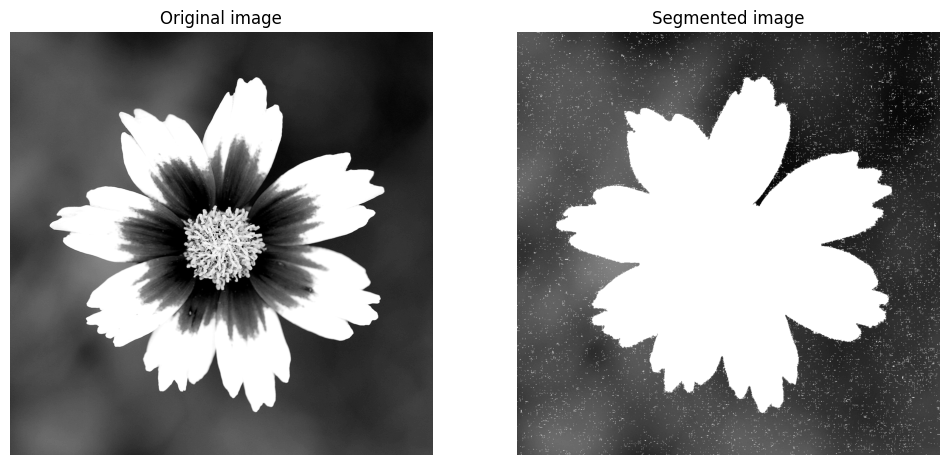

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image=cv.imread('images/flower.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)/255.0
assert image is not None

height,width=image.shape
visited=np.zeros_like(image,dtype=bool)#visited pixels
segment=np.zeros_like(image,dtype=bool)#segmented pixels


#define seed and threshold value
seed=(height//50,width//50)
threshold=0.01

queue=[seed]
visited[seed]=True
segment[seed]=True

def add_neighbours_in_queue(i,j):
    for k in range(-1,2):
        for l in range(-1,2):
            if k==0 and l==0:#center pixel
                continue
            ni,nj=i+k,j+l
            if 0<=ni<height and 0<=nj<width:
                if not visited[ni,nj] and abs(image[ni,nj]-image[i,j])<threshold:
                    queue.append((ni,nj))
                    visited[ni,nj]=True
                    segment[ni,nj]=True
while queue:
    current_pixel=queue.pop(0)
    i,j=current_pixel
    add_neighbours_in_queue(i,j)

segmented_image=np.ones_like(image)
segmented_image[segment]=image[segment]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image,cmap='gray')
plt.title('Segmented image')
plt.axis('off')
plt.show()
        

# K means Clustering

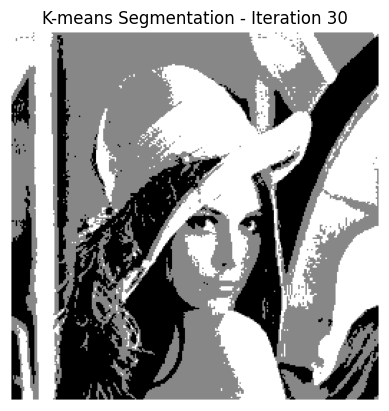

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from IPython.display import clear_output

image=cv.imread('images/girl.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)/255.0
assert image is not None
height,width=image.shape

K=3
iterations=30

np.random.seed(5)
centroids=np.random.rand(K)

def assign_pixels_to_clusters(image,centroids):
    distances =np.abs(image[:,:,np.newaxis]-centroids)
    assignments=np.argmin(distances,axis=2)
    return assignments
def update_centroids(image,assignments,K):
    new_centroids=np.array([image[assignments ==k].mean()for k in range(K)])
    return new_centroids
for iteration in range(iterations):
    assignments=assign_pixels_to_clusters(image,centroids)

    new_centroids=update_centroids(image,assignments,K)

    '''if np.allclose(centroids,new_centroids):
        break'''
    centroids=new_centroids

    clear_output(wait=True)
    segmented_image=centroids[assignments]
    plt.imshow(segmented_image,cmap='gray')
    plt.title(f'K-means Segmentation - Iteration {iteration+1}')
    plt.axis('off')
    plt.pause(0.1)
    plt.show()

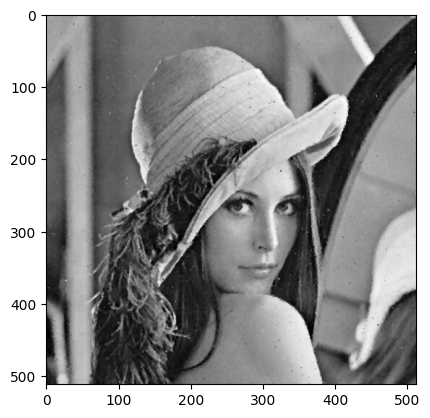

In [28]:
import cv2 as cv
import matplotlib.pyplot as plt
image = cv.imread('images/lena1.jpg', cv.IMREAD_GRAYSCALE)
filtered_image = cv.medianBlur(image, 3)
plt.imshow(filtered_image,cmap='gray')
